In [ ]:
from keras.datasets import imdb

(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[1]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 49ms/step - loss: 0.5062 - acc: 0.8046 - val_loss: 0.3852 - val_acc: 0.8712
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3054 - acc: 0.9030 - val_loss: 0.3070 - val_acc: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2261 - acc: 0.9246 - val_loss: 0.2901 - val_acc: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1789 - acc: 0.9415 - val_loss: 0.2763 - val_acc: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1466 - acc: 0.9529 - val_loss: 0.2935 - val_acc: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1214 - acc: 0.9626 - val_loss: 0.2929 - val_acc: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1014 - acc: 0.9699 - val_loss: 0.3201 - val_acc: 0.8827
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0830 - a

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

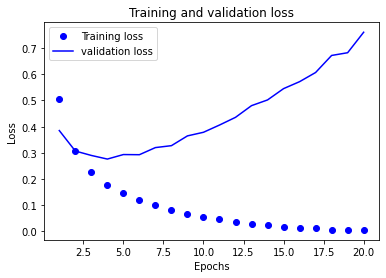

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

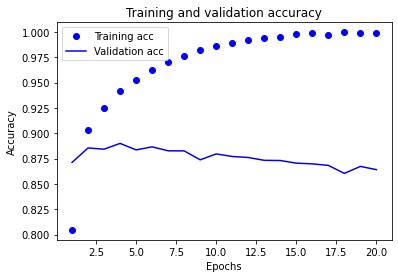

In [ ]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4675 - accuracy: 0.8200
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2691 - accuracy: 0.9069
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2048 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2996 - accuracy: 0.8837


In [ ]:
model.predict(x_test)

array([[0.24408445],
       [0.999985  ],
       [0.9869183 ],
       ...,
       [0.14433122],
       [0.09824651],
       [0.7337946 ]], dtype=float32)

In [ ]:
results

[0.2995913624763489, 0.8837199807167053]

In [ ]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels,dimension = 46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import  to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 2.6060 - accuracy: 0.5199 - val_loss: 1.7707 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4427 - accuracy: 0.6966 - val_loss: 1.3401 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0610 - accuracy: 0.7704 - val_loss: 1.1675 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8396 - accuracy: 0.8216 - val_loss: 1.0410 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6693 - accuracy: 0.8639 - val_loss: 1.0077 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5366 - accuracy: 0.8905 - val_loss: 0.9407 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4365 - accuracy: 0.9134 - val_loss: 0.9339 - val_accuracy: 0.8040
Epoch 8/20
16

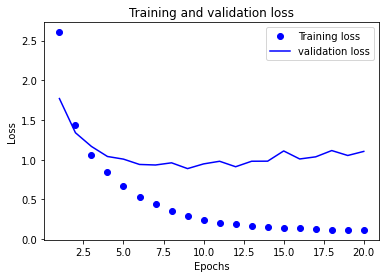

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs =9,
          batch_size=512,
          validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 2.6834 - accuracy: 0.5281 - val_loss: 1.8338 - val_accuracy: 0.6350
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.4621 - accuracy: 0.6986 - val_loss: 1.3364 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.0654 - accuracy: 0.7739 - val_loss: 1.1504 - val_accuracy: 0.7420
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 0.8362 - accuracy: 0.8276 - val_loss: 1.0402 - val_accuracy: 0.7670
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6684 - accuracy: 0.8633 - val_loss: 0.9748 - val_accuracy: 0.7840
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5319 - accuracy: 0.8936 - val_loss: 0.9295 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 1s 44ms/step - loss: 0.4274 - accuracy: 0.9117 - val_loss: 0.9049 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [51]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [52]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [71]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape =(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mean_absolute_error'])
  return model

In [66]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
[2.1976661682128906, 2.3394391536712646, 2.4969661235809326, 2.67128849029541]
2.4263399839401245


In [72]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [77]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

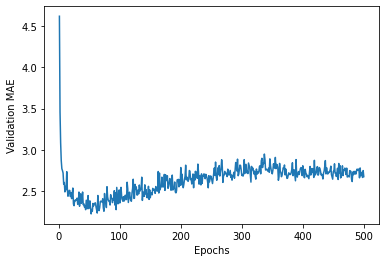

In [78]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

fig5 = plt.gcf()

plt.draw()
fig5.savefig('fig5.png', dpi=100)

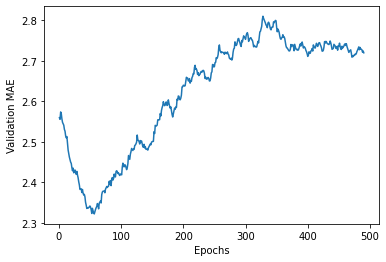

In [79]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [80]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 13.7725 - mean_absolute_error: 2.3928
2.3927879333496094
